In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [88]:
img = cv2.imread(r"C:\Image_Classifier\model\test images\LebronJ.jpeg")
cv2.imshow('lebron',img)
cv2.waitKey(4000)
cv2.destroyAllWindows()
#cv2.destroyWindow()
img.shape


(266, 190, 3)

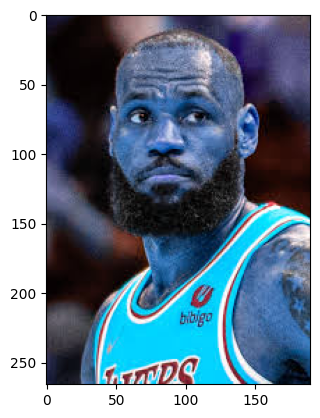

In [89]:
plt.imshow(img)

In [90]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(266, 190)

In [91]:
gray

array([[36, 36, 37, ..., 80, 78, 78],
       [35, 36, 36, ..., 80, 78, 78],
       [34, 34, 34, ..., 82, 79, 78],
       ...,
       [43, 38, 33, ...,  9, 14, 10],
       [45, 44, 41, ..., 33, 20, 17],
       [45, 44, 42, ..., 33, 20, 17]], shape=(266, 190), dtype=uint8)

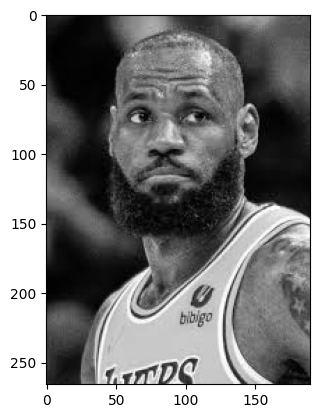

In [92]:
plt.imshow(gray,cmap = 'gray')

In [93]:
face_cascade = cv2.CascadeClassifier("C:\Image_Classifier\model\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:\Image_Classifier\model\opencv\haarcascades\haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[ 32,  30, 109, 109]], dtype=int32)

In [94]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(32), np.int32(30), np.int32(109), np.int32(109))

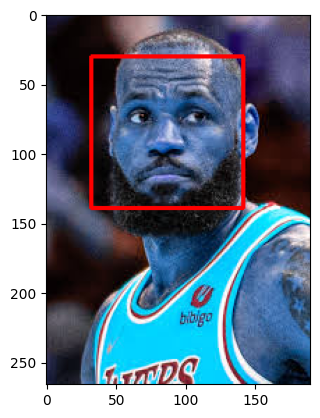

In [95]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

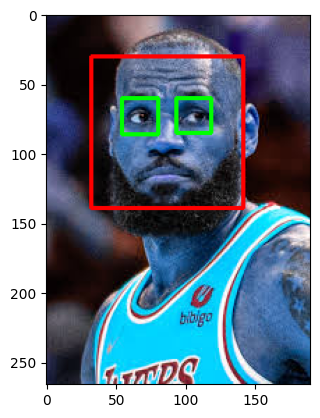

In [96]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap = 'gray')
plt.show()
    

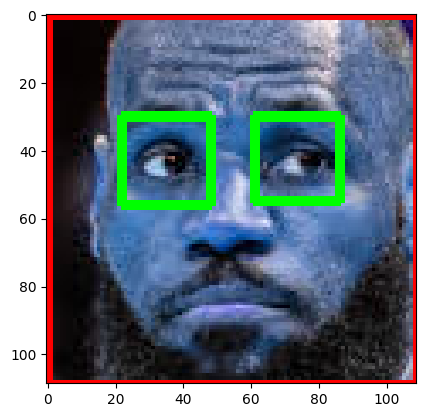

In [97]:
%matplotlib inline
plt.imshow(roi_color,cmap = 'gray')

In [98]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    return None
        

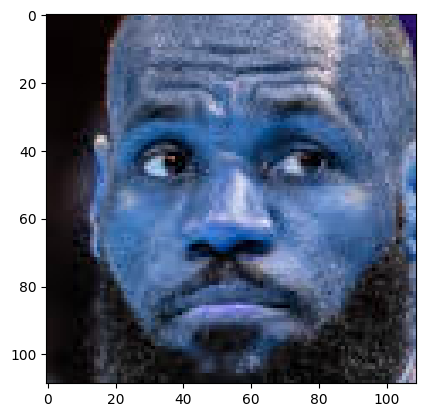

In [99]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Image_Classifier\model\test images\LebronJ.jpeg")
plt.imshow(cropped_image)

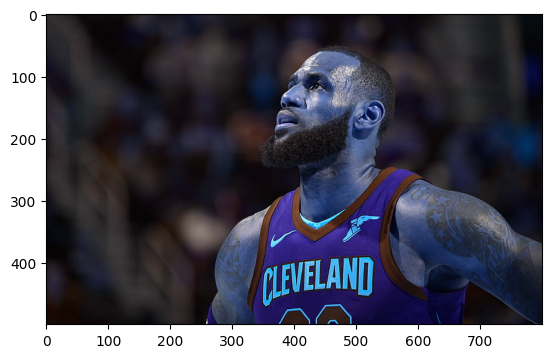

In [100]:
img2 = cv2.imread(r"C:\Image_Classifier\model\test images\lebronjamestest.jpg")
plt.imshow(img2)

In [101]:
cropped_image_no_2 = get_cropped_image_if_2_eyes(r"C:\Image_Classifier\model\test images\lebronjamestest.jpg")
cropped_image_no_2

In [113]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [114]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [115]:
img_dirs

['./dataset/cropped',
 './dataset/lebron_james',
 './dataset/michael_jordan',
 './dataset/shaq',
 './dataset/steph_curry']

In [116]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [117]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 0
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating croppped images in folder: ",cropped_folder)
        
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1
    

cropped
lebron_james
Generating croppped images in folder:  ./dataset/cropped/lebron_james
michael_jordan
Generating croppped images in folder:  ./dataset/cropped/michael_jordan
shaq
Generating croppped images in folder:  ./dataset/cropped/shaq
steph_curry
Generating croppped images in folder:  ./dataset/cropped/steph_curry


In [118]:
import pywt

def w2d(img,mode = 'haar',level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray,mode,level = level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H


    
    
                           




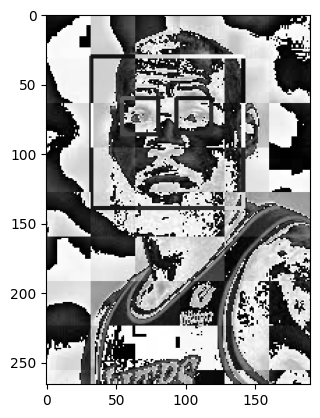

In [119]:
im_har = w2d(img,'db1',5)
plt.imshow(im_har,cmap = 'gray')

In [120]:
celebrity_file_names_dict

{'cropped': [],
 'lebron_james': ['./dataset/cropped/lebron_james/lebron_james0.png',
  './dataset/cropped/lebron_james/lebron_james1.png',
  './dataset/cropped/lebron_james/lebron_james2.png',
  './dataset/cropped/lebron_james/lebron_james3.png',
  './dataset/cropped/lebron_james/lebron_james4.png',
  './dataset/cropped/lebron_james/lebron_james5.png',
  './dataset/cropped/lebron_james/lebron_james6.png',
  './dataset/cropped/lebron_james/lebron_james7.png',
  './dataset/cropped/lebron_james/lebron_james8.png',
  './dataset/cropped/lebron_james/lebron_james9.png',
  './dataset/cropped/lebron_james/lebron_james10.png',
  './dataset/cropped/lebron_james/lebron_james11.png',
  './dataset/cropped/lebron_james/lebron_james12.png',
  './dataset/cropped/lebron_james/lebron_james13.png',
  './dataset/cropped/lebron_james/lebron_james14.png',
  './dataset/cropped/lebron_james/lebron_james15.png',
  './dataset/cropped/lebron_james/lebron_james16.png',
  './dataset/cropped/lebron_james/lebron_ja

In [121]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count +1
class_dict

{'cropped': 0,
 'lebron_james': 1,
 'michael_jordan': 2,
 'shaq': 3,
 'steph_curry': 4}

In [122]:
X,y = [],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_images in training_files:
        img = cv2.imread(training_images)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [123]:
len(X[0])

4096

In [124]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(124, 4096)

In [125]:
X[0]

array([3., 3., 3., ..., 0., 0., 0.], shape=(4096,))

In [126]:
y[0]

1

In [127]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = 'rbf',C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.4838709677419355

In [129]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.50      0.30      0.38        10
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.48      1.00      0.65        12

    accuracy                           0.48        31
   macro avg       0.24      0.33      0.26        31
weighted avg       0.35      0.48      0.37        31



In [130]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [131]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma = 'auto',probability = True),
        'params':{
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model':LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params' : {
            'logisticregression__C': [1,5,10]
        }
    }
        
        
}

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
scores = []
best_estimators = {}
import pandas as pd
for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv = 5,return_train_score = False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.699415,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.601754,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.547953,{'logisticregression__C': 1}


In [134]:
best_estimators['svm'].score(X_test,y_test)

0.5806451612903226

In [135]:
best_estimators['random_forest'].score(X_test,y_test)

0.5483870967741935

In [136]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5483870967741935

In [137]:
best_clf = best_estimators['svm']

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 4,  0,  1,  5],
       [ 0,  1,  0,  0],
       [ 3,  0,  1,  4],
       [ 0,  0,  0, 12]])

Text(95.72222222222221, 0.5, 'Truth')

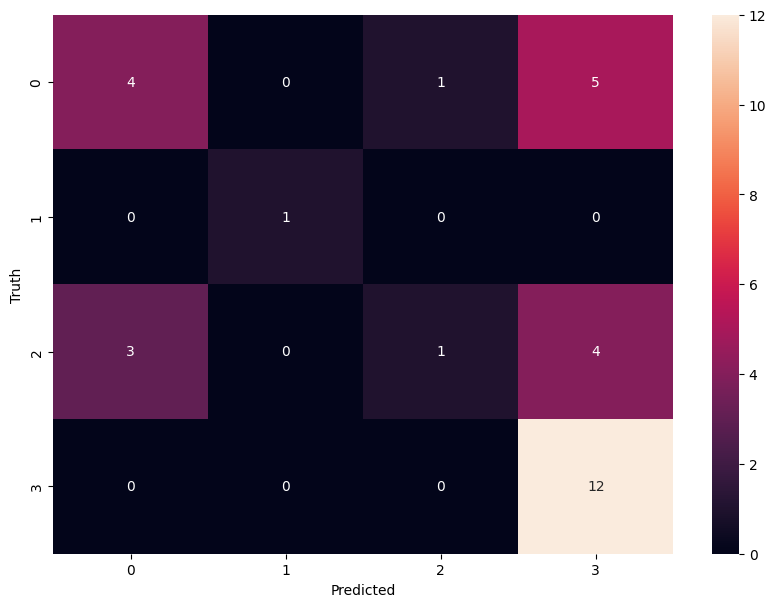

In [139]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
! pip install joblib
import joblib

In [140]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [141]:
import json
with open("class_dictionar.json","w") as f:
    f.write(json.dumps(class_dict))